# Python PIMD report

In [2]:
import numpy as np
import pandas as pd
#from scipy.constants import Boltzmann as BOLTZMANN
#from scipy.constants import hbar 
import matplotlib.pyplot as plt
# below function for nice plots
def design(ax,X_lbl='x',Y_lbl='y',xscl='linear',yscl='linear'):
    '''
    # gets ax and desines it as you wish.
    # for example:
    fig = plt.figure(figsize=(3.8,3.8)) #(width,hight)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.scatter(x,y,color='tab:cyan', marker='o')
    ax.plot([0,200000],[0,200000],color='tab:cyan',linewidth=0.5)
    # now call design:
    design(ax,'x','y','log')
    '''
    plt.rcParams['font.size'] = 15
    plt.rcParams['axes.linewidth'] = 2
    # Edit the major and minor ticks of the x and y axes
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.set_xlabel(X_lbl, labelpad=10)
    ax.set_ylabel(Y_lbl, labelpad=10)
    ax.set_yscale(yscl)
    ax.set_xscale(xscl)

## constants

In [3]:
kB=3.166811563E-6 
K_harm=1.21647924E-8
mass=1

# Energy conservation
## 
4 beads, 10k steps, T=5.8K

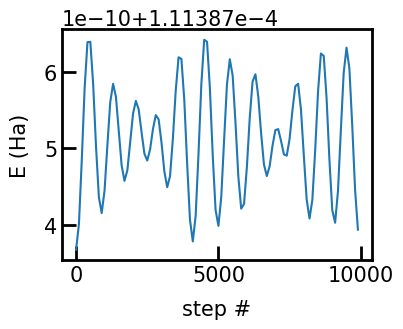

In [138]:
df=pd.read_csv('simlog.csv')
data=df.values
step,H,spring_E=data[:,0],data[:,1],data[:,2]
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(step,H)
design(ax,X_lbl='step #',Y_lbl=r'E (Ha)')

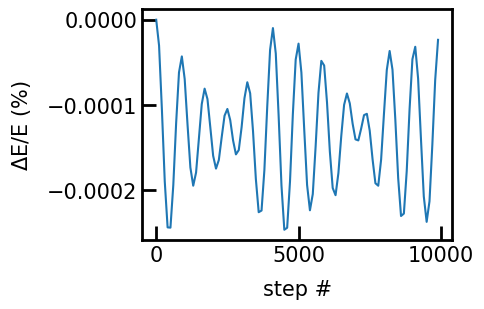

In [139]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(step,100*(H[0]-H)/H)
design(ax,X_lbl='step #',Y_lbl=r'$\Delta$E/E (%)')

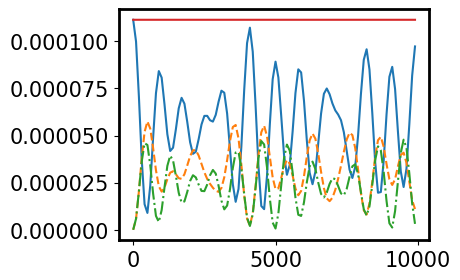

In [140]:
df = pd.read_csv( 'sim.log' ,sep='\s+')
data=df.values
step,K,U,E=data[:,0],data[:,1],data[:,2],data[:,3]
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(step,K)
ax.plot(step,U,'--')
# ax.plot(step,K+U)
ax.plot(step,spring_E,'-.')
ax.plot(step,spring_E+K+U)

## 
64 beads, 100k steps, T=5.8K

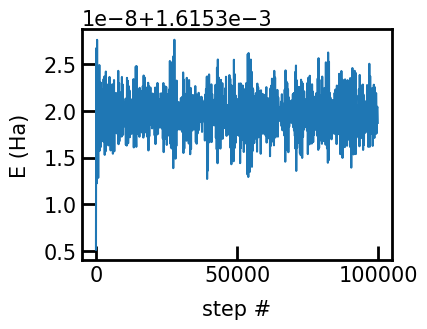

In [150]:
df=pd.read_csv('simlog.csv')
data=df.values
step,H,spring_E=data[:,0],data[:,1],data[:,2]
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(step,H)
design(ax,X_lbl='step #',Y_lbl=r'E (Ha)')

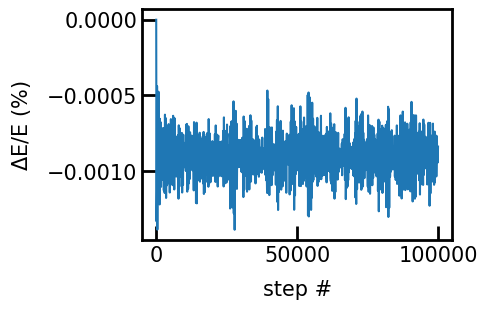

In [151]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(step,100*(H[0]-H)/H)
design(ax,X_lbl='step #',Y_lbl=r'$\Delta$E/E (%)')

# NVT ensemble with Langevin dynamics

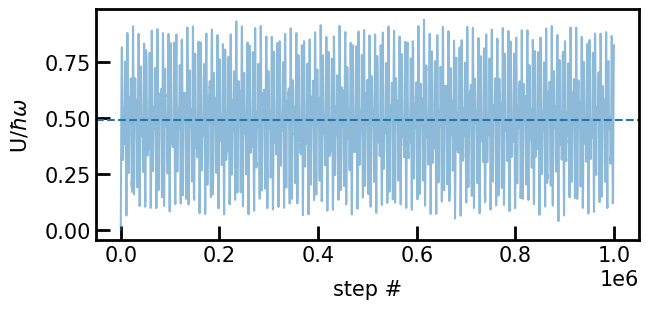

In [205]:
df = pd.read_csv( 'sim.log' ,sep='\s+')
data=df.values
step,K,U,E=data[:,0],data[:,1],data[:,2],data[:,3]
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(step,U/np.sqrt(K_harm),alpha=0.5)
ax.axhline(y=U.mean()/np.sqrt(K_harm),linestyle='--')
design(ax,X_lbl='step #',Y_lbl=r'U/$\hbar\omega$')

In [206]:
beads=[4,8,16,32,64,128]
vir_list=[]
for i in beads:
    df = pd.read_csv( str(i)+'sim.log' ,sep='\s+')
    U=df['U'].values
    vir_list.append([U.mean()/np.sqrt(K_harm)])

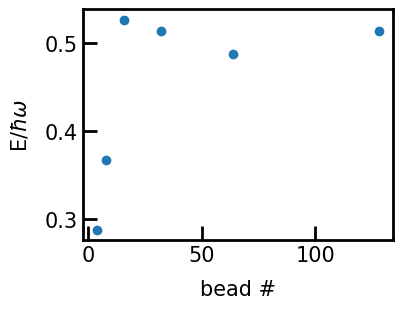

In [209]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(beads,vir_list,'o')
design(ax,X_lbl='bead #',Y_lbl=r'E/$\hbar\omega$')

In [212]:
temps= np.sqrt(K_harm) / np.arange(1,7)
vir_list=[]
for i in np.arange(1,7):
    df = pd.read_csv( str(i)+'hwb_sim.log' ,sep='\s+')
    U=df['U'].values
    vir_list.append([U.mean()/np.sqrt(K_harm)])

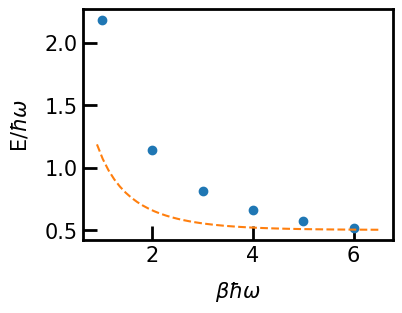

In [219]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(np.arange(1,7),vir_list,'o')
x=np.linspace(0.9,6.5)
ax.plot(x,0.5/np.tanh(0.5*x),'--')
design(ax,X_lbl=r'$\beta\hbar\omega$',Y_lbl=r'E/$\hbar\omega$')